<a href="https://colab.research.google.com/github/aettikang/DataAnalysisPlan/blob/main/%EC%9D%B4%EB%AF%B8%EC%A7%80%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%A0%84%EC%B2%98%EB%A6%AC(github).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

출처 : https://ivo-lee.tistory.com/91

In [1]:
!pip install opencv-python
!pip install opencv-contrib-python

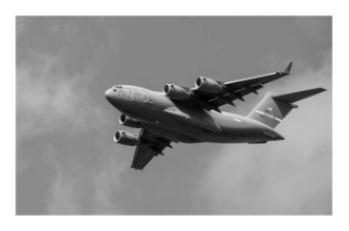

(207, 319)

In [2]:
import cv2
import numpy as np
import requests
from matplotlib import pyplot as plt

image_nparray = np.asarray(bytearray(requests.get("https://raw.githubusercontent.com/aettikang/DataAnalysisPlan/main/plane.jpg").content), dtype=np.uint8)
image = cv2.imdecode(image_nparray, cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
type(image) # 데이터 타입을 확인
image # 이미지 데이터를 확인
image.shape # 차원을 확인 (해상도)

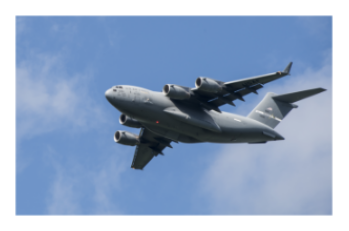

In [3]:
# 컬러로 이미지를 로드합니다.

image_bgr = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
image_bgr[0,0] # 픽셀을 확인
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB) # RGB로 변환
plt.imshow(image_rgb), plt.axis("off") # 이미지를 출력
plt.show()

In [ ]:
#이미지 저장
#github로 직접 이미지 업로드는 불가합니다
#다른 이름으로 저장하시려면 구글 드라이브로 저장해야 합니다.

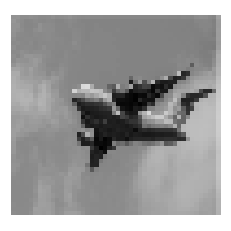

In [4]:
# 이미지 크기 변경
image_50x50 = cv2.resize(image, (50, 50)) # 이미지 크기를 50x50 픽셀로 변경

plt.imshow(image_50x50, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

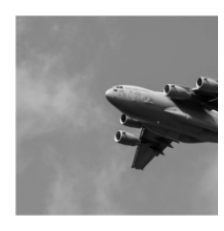

In [5]:
# 이미지 자르기
image_cropped = image[:,:200] # 열의 처음 절반과 모든 행을 선택

plt.imshow(image_cropped, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()

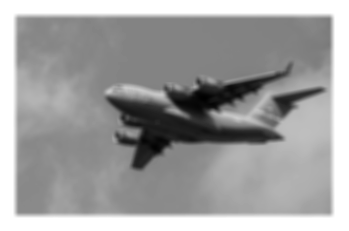

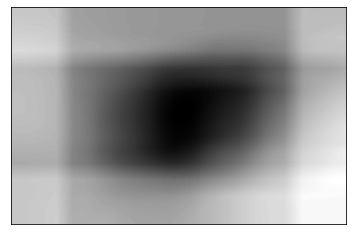

In [6]:
# 이미지 투명도 처리
image_blurry = cv2.blur(image, (5,5))

plt.imshow(image_blurry, cmap="gray"), plt.axis("off") # 이미지를 출력
plt.show()
# 커널 크기의 영향을 강조하기 위해 100X100 커널로 같은 이미지를 흐리게 합니다.
image_very_blurry = cv2.blur(image, (100,100))
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지를 출력
plt.show()

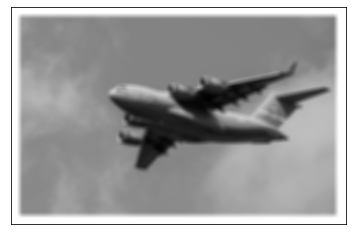

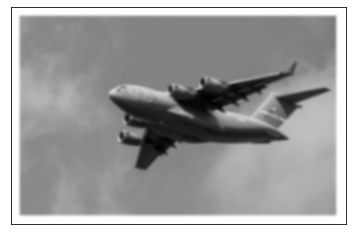

In [7]:
kernel = np.ones((5,5)) / 25.0 # 커널을 만듭니다.
kernel # 커널을 확인
image_kernel = cv2.filter2D(image, -1, kernel) # 커널을 적용
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

image_very_blurry = cv2.GaussianBlur(image, (5,5), 0) # 가우시안 블러를 적용
plt.imshow(image_very_blurry, cmap="gray"), plt.xticks([]), plt.yticks([]) # 이미지 출력
plt.show()

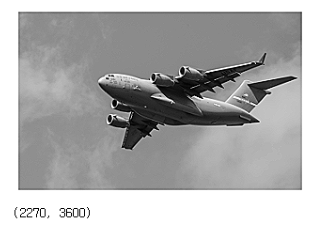

In [9]:
# 이미지 선명하게 하기
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_nparray = np.asarray(bytearray(requests.get("https://raw.githubusercontent.com/aettikang/DataAnalysisPlan/main/plane.png").content), dtype=np.uint8)
image = cv2.imdecode(image_nparray, cv2.IMREAD_GRAYSCALE)


kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]]) # 커널을 만듭니다.

# 이미지를 선명하게 만듭니다.
image_sharp = cv2.filter2D(image, -1, kernel)

plt.imshow(image_sharp, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

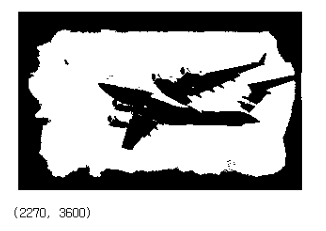

In [13]:
# 이미지 이진화
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_gray = cv2.imdecode(image_nparray, cv2.IMREAD_GRAYSCALE)

max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_gray, max_output_value,
                                         cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
                                         neighborhood_size, subtract_from_mean) # 적응적 임계처리를 적용
plt.imshow(image_binarized, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

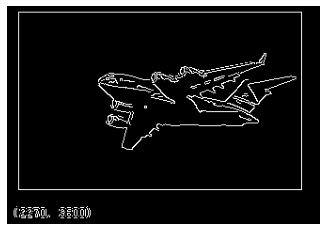

In [14]:
# 경계선 감지
import cv2
import numpy as np
from matplotlib import pyplot as plt

median_intensity = np.median(image_gray) # 픽셀 강도의 중간값을 계산

# 중간 픽셀 강도에서 위아래 1 표준 편차 떨어진 값을 임계값으로 지정합니다.
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# 캐니 경계선 감지기를 적용합니다.
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

plt.imshow(image_canny, cmap="gray"), plt.axis("off") # 이미지 출력
plt.show()

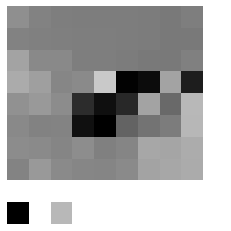

(100,)

In [15]:
# 머신러닝 특성 만들기
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_10x10 = cv2.resize(image, (10, 10)) # 이미지를 10x10 픽셀 크기로 변환
image_10x10.flatten() # 이미지 데이터를 1차원 벡터로 변환

plt.imshow(image_10x10, cmap="gray"), plt.axis("off")
plt.show()

image_10x10.shape
image_10x10.flatten().shape